# A Demonstration of Solving Geodetic Problems With Ellipsoidal Chords

Author: **Marcin Sikorski**<br>
Date: October, 2024

**Introduction**<br>
One of geodesy's main challenges, which still are modern topics, are the geodetic problems. These problems are not only important for geodetic purposes but also navigation and astronomy. There are two fundamental problems. While in plane geometry or on a sphere these two tasks are not that difficult to solve, they become much more complex on a rotational ellipsoid. There are numerous methods presented in all source of research papers and journals (at least fifty) but almost all of them have limitations. This notebook displays a 'chord method' derived and introduced by M.S. Molodensky. His method is modern and required the definition of new geodetic quantities to solve the tasks.

In the **direct problem** (or first problem) the geodetic coordinates $\phi_1$, $\lambda_1$, $h_1$ of point $P_A$ on the rotation ellipsoid are given. Also given are the forward azimuth $\alpha_1$, forward zenith distance $z_1$, and the length $s$ of the chord to point $P_B$. The goal of the problem is to determine the coordinates $\phi_2$, $\lambda_2$, $h_2$ of point $P_B$. Similarly, to get geodetic coordinates at $P_B$ we need: the backward azimuth $\alpha_2$, backward zenith distance $z_2$, and the chord length $s$.

With the **indirect problem** (also called the second, reverse, or inverse problem) the situation is as follows: two points are given with their geodetic coordinates $\phi_1$, $\lambda_1$, $h_1$, $\phi_2$, $\lambda_2$, $h_2$ and the goal of the problem is to determine the chord length $s$ between the two points, the azimuths $\alpha_1$, $\alpha_2$, and the zenith distances $z_1$, $z_2$ at the two points. This task is more complex compared to the direct.

Note that the ellipsoid chord $s$ is a slant distance and is not angular, unlike in conventional solutions. Both azimuths and zenith distances orient the chord in space (its inclination and direction) at either point.

The below solutions will be used to solve the direct and indirect geodetic problems on the GRS80 ellipsoid. Firstly, we will perform the inverse task to obtain azimuths, chord lengths, and zenith distances. Next, to check the correctness of the completed task we will do the direct task - we should expect the exact same geodetic coordinates at either points. A plotting function has been implemented to display the points of interest for better overview. The tasks will be performed on actual IGS (International GNSS Service) stations.

In [1]:
# import class and function
from geodetic_problems import DirectProblem, InverseProblem
from plot_function import point_overview
import math

**First Case**

In [2]:
# decimal latitudes in range [-90, 90]
# decimal longitudes in range (-180, 180)

# OP7100FRA - Paris, France
B1 = 48.836
L1 = 2.335
h1 = 124.553

# SHAO00CHN - Sheshan, China
B2 = 31.100
L2 = 121.200
h2 = 22.0901

inv_task = InverseProblem(lat1=B1, lon1=L1, height1=h1,
                          lat2=B2, lon2=L2, height2=h2,
                          dec_degs=True)

metrics = inv_task.display_measures()

print('==== Inverse problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Inverse problem solutions: ====

XYZ 1 : {'X': 4202771.786310897, 'Y': 171372.28420754368, 'Z': 4778667.537423061} m
XYZ 2 : {'X': -2831686.658943245, 'Y': 4675670.41912429, 'Z': 3275403.3804798643} m
Chord (distance) : 8487173.288661657 m
Cartesian distance : 8487173.288661659 m
Reduced chord : 8487075.872797832 m
Forward azimuth : 48.984298756486595°
Reverse azimuth : 324.47505774300936°
Forward zenith distance : 131.62170278576315°
Reverse zenith distance : 131.67196725646815°


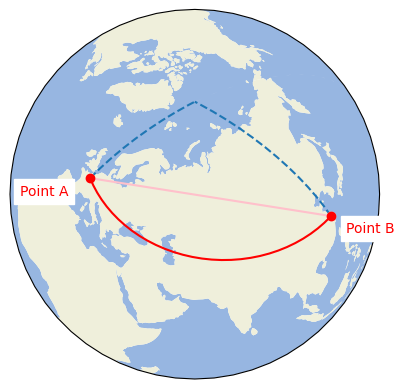

In [3]:
# plot on globe
point_overview(lat1=math.degrees(inv_task.lat1),
               lon1=math.degrees(inv_task.lon1),
               lat2=math.degrees(inv_task.lat2),
               lon2=math.degrees(inv_task.lon2))

In [4]:
# direct task from OP7100FRA (point A) --> SHAO00CHN (point B)
B1 = 48.836
L1 = 2.335
h1 = 124.553

azim = 48.984298756486595
zen = 131.62170278576315
dis = 8487173.288661657

dir_task = DirectProblem(lat1=B1, lon1=L1, height1=h1,
                         azimuth=azim, zenith=zen, chord=dis,
                         dec_degs=True)

metrics = dir_task.display_measures()

print('==== Direct problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Direct problem solutions: ====

Normal radius of curvature : 6383840.653817367 m
Latitude : 31.099999999999994°
Longitude : 121.19999999999999°
Height : 22.09009999781847 m
Reduced chord : 8487075.872741923 m
Reverse zenith distance : 131.67196725646815°
XYZ 2 : {'X': -2831686.6589432447, 'Y': 4675670.41912429, 'Z': 3275403.3804798624} m


> The function returned the exact same geodetic coordinates (SHAO00CHN station), meaning that the inverse task was performed correctly.

**Second Case**

In [5]:
# ISPA00CHL - Easter Island, Chile
B1 = -27.125
L1 = -109.344
h1 = 112.4948

# DJIG00DJI - Observatoire Geophysique d'Arta, Djibouti
B2 = 11.526
L2 = 42.847
h2 = 711.409

inv_task = InverseProblem(lat1=B1, lon1=L1, height1=h1,
                          lat2=B2, lon2=L2, height2=h2,
                          dec_degs=True)

metrics = inv_task.display_measures()

print('==== Inverse problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Inverse problem solutions: ====

XYZ 1 : {'X': -1881664.8684454889, 'Y': -5359992.423984075, 'Z': -2890600.939668182} m
XYZ 2 : {'X': 4583095.583939272, 'Y': 4250981.671034855, 'Z': 1266211.8914733503} m
Chord (distance) : 12306219.715045957 m
Cartesian distance : 12306219.715045959 m
Reduced chord : 12305424.485983763 m
Forward azimuth : 115.82405954149634°
Reverse azimuth : 235.52134060967086°
Forward zenith distance : 164.73602707086152°
Reverse zenith distance : 164.85609853115793°


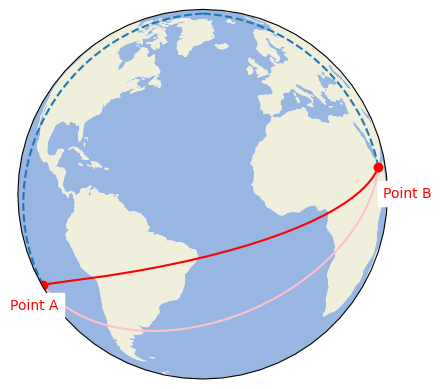

In [6]:
# plot on globe
point_overview(lat1=math.degrees(inv_task.lat1),
               lon1=math.degrees(inv_task.lon1),
               lat2=math.degrees(inv_task.lat2),
               lon2=math.degrees(inv_task.lon2))

In [7]:
# direct task from ISPA00CHL (point A) --> DJIG00DJI (point B)
B1 = -27.125
L1 = -109.344
h1 = 112.4948

azim = 115.82405954149634
zen = 164.73602707086152
dis = 12306219.715045957

dir_task = DirectProblem(lat1=B1, lon1=L1, height1=h1,
                         azimuth=azim, zenith=zen, chord=dis,
                         dec_degs=True)

metrics = dir_task.display_measures()

print('==== Direct problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Direct problem solutions: ====

Normal radius of curvature : 6378989.5247089835 m
Latitude : 11.525999999999994°
Longitude : 42.84699999999998°
Height : 711.4089999990538 m
Reduced chord : 12305424.48591614 m
Reverse zenith distance : 164.85609853115793°
XYZ 2 : {'X': 4583095.583939272, 'Y': 4250981.671034853, 'Z': 1266211.8914733496} m


**Third Case**

The angular measures for each task will be displayed in DMS. Note that the provided arguments still must be decimal degrees.

In [8]:
# XMIS00AUS - Christmas Island, Australia
B1 = -10.450
L1 = 105.689
h1 = 261.5

# MCIL00JPN - Ogasawara, Japan
B2 = 24.290
L2 = 153.979
h2 = 35.66

inv_task = InverseProblem(lat1=B1, lon1=L1, height1=h1,
                          lat2=B2, lon2=L2, height2=h2,
                          dec_degs=False)

metrics = inv_task.display_measures()

print('==== Inverse problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Inverse problem solutions: ====

XYZ 1 : {'X': -1696396.776726491, 'Y': 6039574.531302264, 'Z': -1149279.5260102008} m
XYZ 2 : {'X': -5227207.08868569, 'Y': 2551851.29333843, 'Z': 2607608.432730881} m
Chord (distance) : 6224551.548361061 m
Cartesian distance : 6224551.548361061 m
Reduced chord : 6224406.21441199 m
Forward azimuth : 53°6'49.85885834"
Reverse azimuth : 239°35'29.51606544"
Forward zenith distance : 119°16'58.00628526"
Reverse zenith distance : 119°15'52.15889631"


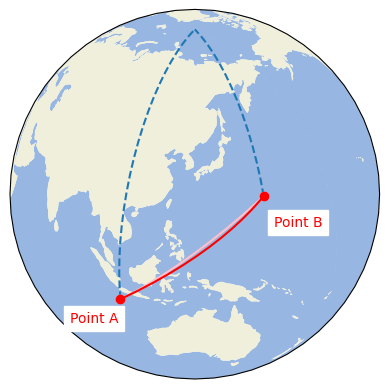

In [9]:
# plot on globe
point_overview(lat1=math.degrees(inv_task.lat1),
               lon1=math.degrees(inv_task.lon1),
               lat2=math.degrees(inv_task.lat2),
               lon2=math.degrees(inv_task.lon2))

In [10]:
# direct task from XMIS00AUS (point A) --> MCIL00JPN (point B)
B1 = -10.450
L1 = 105.689
h1 = 261.5

azim = 53.11384968287349
zen = 119.28277952368234
dis = 6224551.548361061

dir_task = DirectProblem(lat1=B1, lon1=L1, height1=h1,
                         azimuth=azim, zenith=zen, chord=dis,
                         dec_degs=False)

metrics = dir_task.display_measures()

print('==== Direct problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Direct problem solutions: ====

Normal radius of curvature : 6381752.576287733 m
Latitude : 24°17'24.00000000"
Longitude : 153°58'44.40000000"
Height : 35.659999994561076 m
Reduced chord : 6224406.214380238 m
Reverse zenith distance : 119°15'52.15889631"
XYZ 2 : {'X': -5227207.088685687, 'Y': 2551851.2933384283, 'Z': 2607608.4327308782} m


**Forth Case**

In [11]:
# CRO100VIR - Christiansted, Virgin Islands (USA)
B1 = 17.757
L1 = -64.584
h1 = -31.4974

# ADIS00ETH - Addis Ababa, Ethiopia
B2 = 9.035
L2 = 38.766
h2 = 2439.149

inv_task = InverseProblem(lat1=B1, lon1=L1, height1=h1,
                          lat2=B2, lon2=L2, height2=h2,
                          dec_degs=True)

metrics = inv_task.display_measures()

print('==== Inverse problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Inverse problem solutions: ====

XYZ 1 : {'X': 2607800.557841674, 'Y': -5488059.429701798, 'Z': 1932778.6564600943} m
XYZ 2 : {'X': 4913675.534438786, 'Y': 3945898.0774379657, 'Z': 995368.5016786864} m
Chord (distance) : 9756810.516377918 m
Cartesian distance : 9756810.516377917 m
Reduced chord : 9754969.24058365 m
Forward azimuth : 77.10176947073874°
Reverse azimuth : 289.86268448196034°
Forward zenith distance : 139.8557431060579°
Reverse zenith distance : 139.88999946709234°


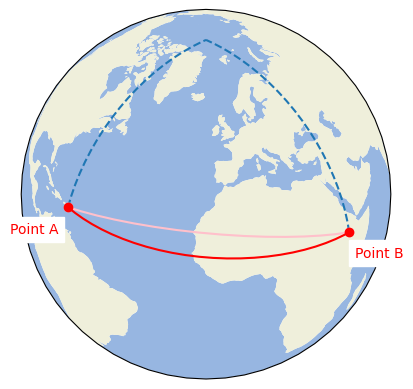

In [12]:
# plot on globe
point_overview(lat1=math.degrees(inv_task.lat1),
               lon1=math.degrees(inv_task.lon1),
               lat2=math.degrees(inv_task.lat2),
               lon2=math.degrees(inv_task.lon2))

In [13]:
# direct task from ADIS00ETH (point A) --> CRO100VIR (point B)
B1 = 17.757
L1 = -64.584
h1 = -31.4974

azim = 77.10176947073874
zen = 139.8557431060579
dis = 9756810.516377918

dir_task = DirectProblem(lat1=B1, lon1=L1, height1=h1,
                         azimuth=azim, zenith=zen, chord=dis,
                         dec_degs=True)

metrics = dir_task.display_measures()

print('==== Direct problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Direct problem solutions: ====

Normal radius of curvature : 6378663.545958979 m
Latitude : 9.035000000000014°
Longitude : 38.76599999999998°
Height : 2439.1490000020713 m
Reduced chord : 9754969.24054242 m
Reverse zenith distance : 139.8899994670923°
XYZ 2 : {'X': 4913675.534438789, 'Y': 3945898.077437965, 'Z': 995368.501678688} m


However, due to different quadrants, hemispheres, and special cases, there still will be moments when the user will need to determine the azimuths by his own by adding quarters to the result. Azimuth values can be tricky to compute, especially when their latitudes or longitudes are closed valued. In most cases these two geodetic tasks are performed from left to right, meaning point A is left-sided and point B is on the right. Here are fews noted cases.

**Fifth Case**

In [14]:
# IQAL00CAN - Iqaluit, Canada
B1 = 63.756
L1 = -68.510
h1 = 91.7

# YAKT00RUS - Yakutsk, Russia Siberia
B2 = 62.031
L2 = 129.680
h2 = 103.37

inv_task = InverseProblem(lat1=B1, lon1=L1, height1=h1,
                          lat2=B2, lon2=L2, height2=h2,
                          dec_degs=True)

metrics = inv_task.display_measures()

print('==== Inverse problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Inverse problem solutions: ====

XYZ 1 : {'X': 1036022.5516523708, 'Y': -2631443.2243355126, 'Z': 5697821.464079584} m
XYZ 2 : {'X': -1914984.2165558902, 'Y': 2308248.6007620133, 'Z': 5610227.641597203} m
Chord (distance) : 5754708.415782974 m
Cartesian distance : 5754708.415782972 m
Reduced chord : 5754620.648955833 m
Forward azimuth : 169.50368136433667°
Reverse azimuth : 189.89135406107678°
Forward zenith distance : 116.73749437935115°
Reverse zenith distance : 116.740073762636°


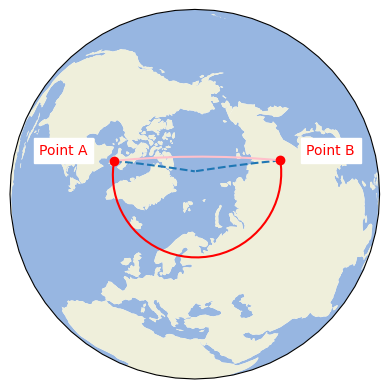

In [15]:
# plot on globe
point_overview(lat1=math.degrees(inv_task.lat1),
               lon1=math.degrees(inv_task.lon1),
               lat2=math.degrees(inv_task.lat2),
               lon2=math.degrees(inv_task.lon2))

> The pink line is the chord and it indicates that both azimuths are close to 360°. We will need to add two quarters, that is 180° (or $\pi$).

In [16]:
# direct task from YAKT00RUS (point B) --> IQAL00CAN (point A)
B1 = 62.031
L1 = 129.680
h1 = 103.37 

azim = 189.89135406107678
zen = 116.740073762636
dis = 5754708.415782974

# notice 180 addition to the forward azimuth
metrics = DirectProblem(lat1=B1, lon1=L1, height1=h1,
                        azimuth=azim + 180, zenith=zen, chord=dis,
                        dec_degs=True).display_measures()

print('==== Direct problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Direct problem solutions: ====

Normal radius of curvature : 6395381.04660151 m
Latitude : 63.755999999999986°
Longitude : -68.50999999999992°
Height : 91.69999999925494 m
Reduced chord : 5754620.648955103 m
Reverse zenith distance : 116.73749437935115°
XYZ 2 : {'X': 1036022.5516523748, 'Y': -2631443.224335512, 'Z': 5697821.464079583} m


In [17]:
# direct task from IQAL00CAN (point A) --> YAKT00RUS (point B)
B1 = 63.756
L1 = -68.510
h1 = 91.7

azim = 169.50368136433667
zen = 116.73749437935115
dis = 5754708.415782974

# notice 180 addition to the azimuth
metrics = DirectProblem(lat1=B1, lon1=L1, height1=h1,
                        azimuth=azim + 180, zenith=zen, chord=dis,
                        dec_degs=True).display_measures()

print('==== Direct problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Direct problem solutions: ====

Normal radius of curvature : 6394855.555504615 m
Latitude : 62.03099999999997°
Longitude : 129.68°
Height : 103.36999999918044 m
Reduced chord : 5754620.648955103 m
Reverse zenith distance : 116.740073762636°
XYZ 2 : {'X': -1914984.2165558913, 'Y': 2308248.6007620147, 'Z': 5610227.6415972} m


> A manual check and adding 180° to the forward azimuth returned proper coordinates. It is always advisable to plot both points.

**Sixth Case**

In [18]:
# ZAMB00ZMB - Lusaka, Zambia
B1 = -15.426
L1 = 28.311
h1 = 1324.9144

# KIRU00SWE - Kiruna, Sweden
B2 = 67.857
L2 = 20.968
h2 = 390.09

inv_task = InverseProblem(lat1=B1, lon1=L1, height1=h1,
                          lat2=B2, lon2=L2, height2=h2,
                          dec_degs=True)

metrics = inv_task.display_measures()

print('==== Inverse problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Inverse problem solutions: ====

XYZ 1 : {'X': 5415341.738857043, 'Y': 2917202.3357295725, 'Z': -1685937.8551752653} m
XYZ 2 : {'X': 2251461.1352573084, 'Y': 862812.5243602233, 'Z': 5885461.104096066} m
Chord (distance) : 8459121.713945711 m
Cartesian distance : 8459121.713945711 m
Reduced chord : 8457979.377737103 m
Forward azimuth : 177.19898391196912°
Reverse azimuth : 352.85462388042913°
Forward zenith distance : 131.79968257273975°
Reverse zenith distance : 131.65519498088744°


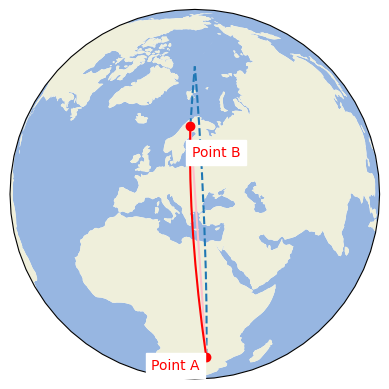

In [19]:
# plot on globe
point_overview(lat1=math.degrees(inv_task.lat1),
               lon1=math.degrees(inv_task.lon1),
               lat2=math.degrees(inv_task.lat2),
               lon2=math.degrees(inv_task.lon2))

> Similarly as in previous case, both azimuths are close to 360° and the points are nearly antipodal. The forward azimuth will need an addition.

In [20]:
# direct task from ZAMB00ZMB (point A) --> KIRU00SWE (point B)
B1 = -15.426
L1 = 28.311
h1 = 1324.9144

azim = 177.19898391196912
zen = 131.79968257273975
dis = 8459121.713945711

# notice 180 addition to the azimuth
dir_task = DirectProblem(lat1=B1, lon1=L1, height1=h1,
                         azimuth=azim + 180, zenith=zen, chord=dis,
                         dec_degs=True)

metrics = dir_task.display_measures()

print('==== Direct problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Direct problem solutions: ====

Normal radius of curvature : 6396532.118071955 m
Latitude : 67.85700000000003°
Longitude : 20.967999999999915°
Height : 390.08999999798834 m
Reduced chord : 8457979.37321052 m
Reverse zenith distance : 131.65519498088747°
XYZ 2 : {'X': 2251461.135257306, 'Y': 862812.5243602187, 'Z': 5885461.104096065} m


**Seventh Case**

In [21]:
# ROAG00ESP - San Fernando, Spain
B1 = 36.463
L1 = -6.206
h1 = 83.2

# WGTN00NZL - Wellington, New Zealand
B2 = -41.323
L2 = 174.806
h2 = 26.06

inv_task = InverseProblem(lat1=B1, lon1=L1, height1=h1,
                          lat2=B2, lon2=L2, height2=h2,
                          dec_degs=True)

metrics = inv_task.display_measures()

print('==== Inverse problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Inverse problem solutions: ====

XYZ 1 : {'X': 5105603.0156150265, 'Y': -555186.9539203267, 'Z': 3769682.718495116} m
XYZ 2 : {'X': -4777303.591465, 'Y': 434264.26877767063, 'Z': -4189446.434562463} m
Chord (distance) : 12727866.81268372 m
Cartesian distance : 12727866.812683722 m
Reduced chord : 12727757.646162514 m
Forward azimuth : 9.646393231550311°
Reverse azimuth : 351.1230867711573°
Forward zenith distance : 177.72334247621797°
Reverse zenith distance : 177.3529877218189°


posx and posy should be finite values
posx and posy should be finite values


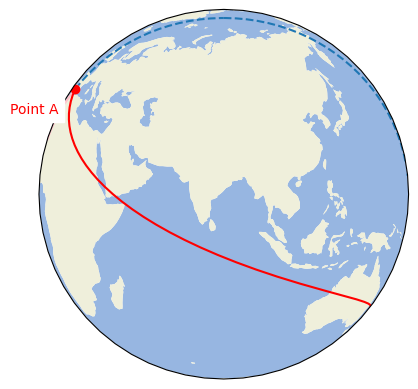

In [22]:
# plot on globe
point_overview(lat1=math.degrees(inv_task.lat1),
               lon1=math.degrees(inv_task.lon1),
               lat2=math.degrees(inv_task.lat2),
               lon2=math.degrees(inv_task.lon2))

In [23]:
# direct task from ROAG00ESP (point A) --> WGTN00NZL (point B)
B1 = 36.463
L1 = -6.206
h1 = 83.2

azim = 9.646393231550311
zen = 177.72334247621797
dis = 12727866.81268372

# notice 180 addition to the azimuth
dir_task = DirectProblem(lat1=B1, lon1=L1, height1=h1,
                         azimuth=azim + 180, zenith=zen, chord=dis,
                         dec_degs=True)

metrics = dir_task.display_measures()

print('==== Direct problem solutions: ====\n')
for key, value in metrics.items():
    print(key, ':', value)

==== Direct problem solutions: ====

Normal radius of curvature : 6387465.5249295505 m
Latitude : -41.32299999999999°
Longitude : 174.80600000000004°
Height : 26.060000020079315 m
Reduced chord : 12727757.646160377 m
Reverse zenith distance : 177.35298772182094°
XYZ 2 : {'X': -4777303.591465015, 'Y': 434264.2687776699, 'Z': -4189446.434562476} m


All seven cases presented how accurate is this method of solving geodetic problems. After rounding the results there are no differences between the input geodetic coordinates and the computed.

**Pros**
* Unlike classical and conventional methods (Delambre, Gauss, Legendre, Clarke, Krüger, Helmert, Schreiber, etc.), the chord method has no distance limitations which is its largest advantage. Even Bessel-Helemert's or Vincenty's solutions fail in these terms and are useful to some maximum distances (20 000 km). The chord method can be implemented for continental or even satellite distances.
* Another great advantage is its ability to calculate the point height above the ellipsoid in which other methods cannot cope.
* Fast, accurate, and robust.
* No numerical calculations, tables, or coefficients are required. Only plain formulas are used for calculations. Geodesic properties mostly require differential and integral computing. For example, the Kivioja algorithm requires a lot of incrementing and iterative calculations.
* Highly effective for modern and spatial geodesy.
* This method of solving the geodetic problems is easy to understand and the steps are straight-forward. The chord solution and older entail solving an ellipsoidal triangle.

**Cons**
* Although this method seems to be almost fully reliable and accurate, it is not widely known or used by geodesists and scientists. This might be due to the fact that most geodetic tasks are practiced on arc lengths along the geodesic between points and not straight lines.
* The method is still not completely foolproof and perfect in terms of azimuths. We still need to perform azimuth checks in order to determine its correct quadrant. The class object will might need additional fixes.

**References:**
* C.F.F. Karney, 2011, *Algorithms for geodesics*, [Full Text](https://arxiv.org/pdf/1109.4448)
* M.S. Molodensky, V.F. Eremeev, M.I. Yurkina, 1962, *Methods for the Study of the External Gravitational Field and Figure of the Earth (transl. from Russian)*, Israel Program of Scientific Translations
* M.J. Sevilla, 1981, *Sobre un método de cálculo para la resolución de los problemas geodésicos directo e inverso*, [Full Text](https://digital.csic.es/bitstream/10261/27896/1/N113_1981.pdf)
* M. Sikorski, 2016, *Przenoszenie współrzędnych na łącznicy stacji satelitarnych przy użyciu cięciw elipsoidalnych*